Linear Models Assignment- Avery Anderson

Question 1: a) what makes a model "linear"? Linear in what?

A model is linear when there is a constant coefficient. This creates a predictor model that appears to be a line as the increase of one variable has a corresponding response in another variable

How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) 

A dummy/one hot encoded variable creates a problem because when we convert categories to numbers we fall into the trap of not being able to really define coefficients. When dealing with linear models for dummy variables, you have to choose to keep the intercept and use pd.get_dummies for the variables or you can drop the intercept and keep the dummies. Either way it is important to note the change in the actual meaning of the coefficient will not translate the same way it would with a non-categorical dataset.

Can linear regression be used for classification? Explain why, or why not.

No it cannot because a linear regression model is predicting an increasing value. For example, you can predict a car's price but not a model using a linear regression for this very reason, the number of models is limited while price is a continuous potential number.

What are signs that your linear model is over-fitting?

Overfitting is likely going to occur because you have used too many variables and datapoints to create your model. This will become noticeable when the model performs really well on the data it was trained on, but is very inaccurate on new test datapoints

Clearly explain multi-colinearity using the two-stage least squares technique.

Multi-colinearity is basically the idea that the independent variables being used are highly correlated and you end up with a estimates that are unstable and likely inaccurate. To help fight multi-colinearity, two-stage least squares technique can be used. The first stage is regressing the problem variable onto the other variables to isolate the issue. In the second stage, you use the predictions you just got as the regressor for the actual regression model you want. 

How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable  and your features/control/response/independent variables  into your analysis?

To still use a linear model with nonlinear relationships, you can use transformations on data like logs and exponents. When you do this, though, you have to be aware of the new way to interpret coefficents since you transformed data. 

What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept is simply the predicted value when the dependent variable is zero (assuming you did not transform the data). The slope coeffceint is the amount of predicted change for a variable in response to another. The coefficent for a dummy/one hot encoded variable cannot be interpreted in the same way and has to be seen as more of an average difference between categories

QUESTION 3

In [10]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [11]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/cars_hw.csv',low_memory=False) #read in data

In [84]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [99]:
df['Price'] = np.arcsinh(df['Price'])

Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [101]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(976, 12) 

Unnamed: 0             int64
Make                  object
Make_Year              int64
Color                 object
Body_Type             object
Mileage_Run            int64
No_of_Owners          object
Seating_Capacity       int64
Fuel_Type             object
Transmission          object
Transmission_Type     object
Price                float64
dtype: object 

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object') 



In [103]:
df.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


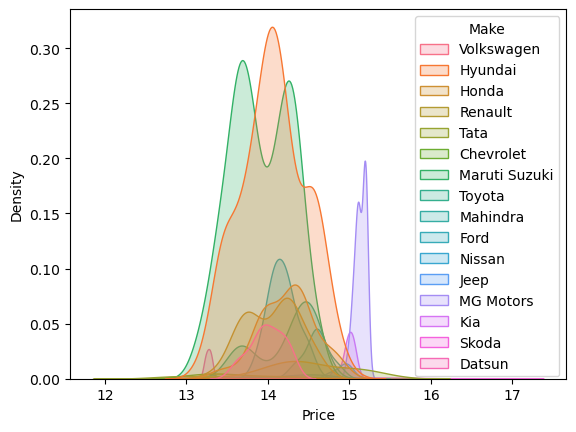

In [107]:
sns.kdeplot(data=df, x="Price", hue="Make", fill=True)
plt.show()

Split the data into an 80% training set and a 20% testing set.

In [18]:
df1 = df[['Make', 'Price']]
df_encode = pd.get_dummies(df1, columns=['Make'], drop_first=True)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_encode, test_size=0.2, random_state=42)

Make a model where you regress price on the numeric variables alone; what is the 
 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the 
 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the 
 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [123]:
from sklearn.linear_model import LinearRegression # Import linear regression model

y = df['Price'] # Target variable

vars = ['Mileage_Run', 'Seating_Capacity'] # numeric variables alone

X = df.loc[:,vars] # Construct data matrix
X.head() # Peek at data

,Mileage_Run,Seating_Capacity
0,44611,5
1,20305,5
2,29540,5
3,35680,5
4,25126,5


In [125]:
reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

13.71173418177413
[-3.48864207e-06  1.05484413e-01]
0.044089126182227156


In [22]:
y = df['Price'] #using a categorical variable (2nd model)
X_d = pd.get_dummies(df['Make'],dtype='int') # Create brand dummies
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) 
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print('R-squared: ', reg.score(X_d, y)) 
results

R-squared:  0.5203564146667528


,variable,coefficient
0,Chevrolet,4.535000e+05
1,Datsun,2.896667e+05
2,Ford,7.211731e+05
3,Honda,7.989726e+05
4,Hyundai,6.918918e+05
5,Jeep,1.499500e+06
6,Kia,1.614750e+06
7,MG Motors,1.869457e+06
8,Mahindra,1.100167e+06
9,Maruti Suzuki,5.887850e+05


In [151]:
df_model3 = df[['Mileage_Run', 'Seating_Capacity', 'Make', 'Price']]
df_encoded = pd.get_dummies(df_model3, columns=['Make'], drop_first=True)
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure
# Train a linear regression model


13.474775089669413
[-2.86660333e-06  6.21256701e-02 -3.51886952e-01  5.04241143e-01
  5.58551610e-01  4.09789096e-01  1.26655461e+00  1.26757162e+00
  1.43770542e+00  8.63526830e-01  2.30986407e-01  5.96103602e-01
  3.31704911e-01  7.21515650e-01  6.85572097e-01  5.40890369e-01
  3.66290185e-01]
0.379845671583815


Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the 
 and RMSE change? At what point does 
 go negative on the test set? For your best model with expanded features, what is the 
 and RMSE? How does it compare to your best model from part 4?

In [154]:
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,Mileage_Run,Seating_Capacity,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,...,Make_Skoda^2,Make_Skoda Make_Tata,Make_Skoda Make_Toyota,Make_Skoda Make_Volkswagen,Make_Tata^2,Make_Tata Make_Toyota,Make_Tata Make_Volkswagen,Make_Toyota^2,Make_Toyota Make_Volkswagen,Make_Volkswagen^2
0,44611.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20305.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29540.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35680.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25126.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
## Only compute the interactions up to degree 3:
expander = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,Mileage_Run,Seating_Capacity,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,...,Make_Renault Make_Skoda Make_Tata,Make_Renault Make_Skoda Make_Toyota,Make_Renault Make_Skoda Make_Volkswagen,Make_Renault Make_Tata Make_Toyota,Make_Renault Make_Tata Make_Volkswagen,Make_Renault Make_Toyota Make_Volkswagen,Make_Skoda Make_Tata Make_Toyota,Make_Skoda Make_Tata Make_Volkswagen,Make_Skoda Make_Toyota Make_Volkswagen,Make_Tata Make_Toyota Make_Volkswagen
0,44611.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20305.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29540.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35680.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25126.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

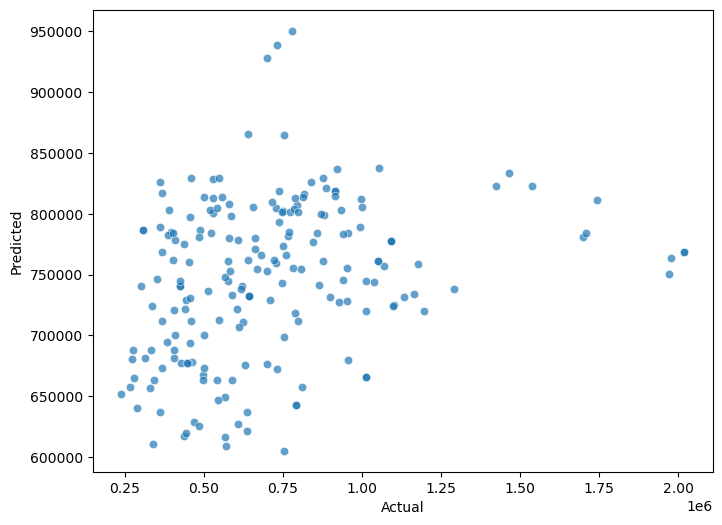

In [24]:
X = df[['Seating_Capacity', 'Mileage_Run']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Question 7:

When will b* be large or small, depending on the relationship between X and Y and the variance of X?

B* will be large when the relationhip between X and Y is strong, that their correlation is strong. In the opposite case, b* will be small when the relationship between x and y is weaker. As for variance, when there is low variance, b* is larger. If there are more variancea and x is more spread, the b* is smaller. 

Part 2:

Added noise from an unclean dataset does affect the intercept of the model. If the noise forced the b* to contort to weird variables, this in turn affects the intercept as it works to compensate for that. The main difference in b* that stems from a dataset with a lot of noise copmared to one without is the variance between sets. More noise leads to more variance which often causes a b* that underestimates the reality due to the attenuation phenomenon impacting the prediction model. 

Part 3: 

Random noise will affect slope even if it is zero on average and independent of either of the variables. This is because noise affects variance. Even when it is not as noticable, like in this "perfect" case, the noise adjusts the variance of the dataset which in turn affects any model we make off of that dataset. While the general relationship is likely to still be shown, the accuracy of the model could still be improved if there was no noise present. 

Part 4: How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

Attenuation is determined by how much "noise" is in the dataset. The cleaner the data, the less attenuation occurs and the more accurate the model as it does not fall prey to underestimating. However, the cost-benefit analysis comes into play because getting a dataset that is perfectly clean can be incredibly timely and expensive. Attenuation is definitely a factor that one needs to be aware of when creating models, but it is important to note that a dataset that is fairly clean is still going to return a model that somewhat accurately models a relationship, maybe just a little less than a perfectly clean set. 